In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
user_data = pd.read_csv('3_user_data.csv')
user_data

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49
...,...,...,...
2949,19411,False,29
2950,61579,False,50
2951,61221,True,64
2952,29863,False,46


In [6]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2954 entries, 0 to 2953
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   client   2954 non-null   int64
 1   premium  2954 non-null   bool 
 2   age      2954 non-null   int64
dtypes: bool(1), int64(2)
memory usage: 49.2 KB


In [7]:
logs = pd.read_csv('3_logs.csv')
logs

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
...,...,...,...,...
4495,64496,False,computer,1585459072
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121
4498,52880,False,phone,1585455362


In [8]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   client    4500 non-null   int64 
 1   success   4500 non-null   bool  
 2   platform  4500 non-null   object
 3   time      4500 non-null   int64 
dtypes: bool(1), int64(2), object(1)
memory usage: 110.0+ KB


In [9]:
logs.platform.nunique()

3

In [30]:
success_clients = logs\
                .query("success == True")\
                .groupby('client', as_index=False)\
                .client.value_counts()\
                .sort_values('count', ascending=False)\
                .rename(columns={'count': 'counts'})

In [33]:
max_count = success_clients.counts.max()
max_count

41

In [41]:
final = success_clients.loc[success_clients['counts'] == max_count].loc[:, ['client']]
final

,client
332,12179
810,28719
1020,36165
1487,52870
2626,92584
1758,61468
1759,61473
2231,78349
2345,82563


In [45]:
result_string = ', '.join(final['client'].sort_values().astype(str))
result_string

'12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584'

In [46]:
best_platform = logs\
                .groupby('platform', as_index=False)\
                .platform.value_counts()\
                .sort_values('count', ascending=False)\
                .rename(columns={'count': 'counts'})
best_platform

,platform,counts
1,phone,2753
0,computer,1505
2,tablet,242


In [53]:
best_premium_platform = logs.merge(user_data, on='client')\
                        .query("premium == True")\
                        .groupby('platform', as_index=False)\
                        .platform.value_counts()\
                        .sort_values('count', ascending=False)\
                        .rename(columns={'count': 'counts'})
best_premium_platform

,platform,counts
1,phone,246
0,computer,150
2,tablet,24


In [62]:
age_premium = logs.merge(user_data, on='client')
age_premium

,client,success,platform,time,premium,age
0,61468,True,phone,1585425658,False,25
1,61468,True,computer,1585460504,False,25
2,61468,True,computer,1585430291,False,25
3,61468,True,computer,1585444317,False,25
4,61468,True,phone,1585441266,False,25
...,...,...,...,...,...,...
3434,62438,False,phone,1585479041,False,36
3435,95152,True,computer,1585420263,False,67
3436,64496,False,computer,1585459072,False,66
3437,8967,True,phone,1585465121,False,33


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


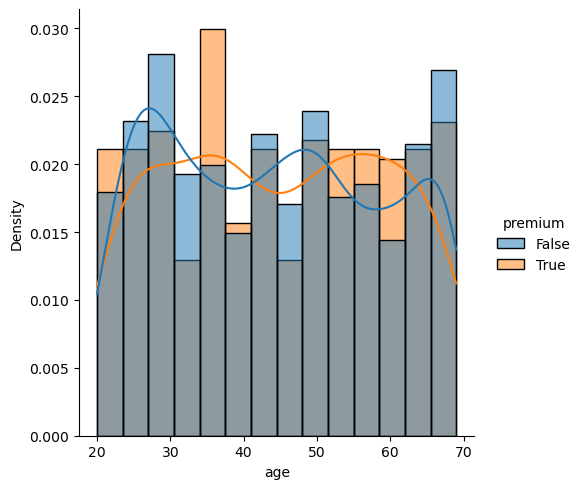

In [65]:
sns.displot(data=age_premium, x='age', hue='premium', kde=True, kind='hist', stat='density', common_norm=False, bins=14)

In [77]:
success_operations = logs\
                    .groupby('client', as_index=False)\
                    .agg({'success': 'sum'})
success_operations

,client,success
0,40,1
1,50,1
2,75,1
3,81,1
4,132,1
...,...,...
4006,99927,1
4007,99931,1
4008,99952,0
4009,99973,1


<Axes: xlabel='success', ylabel='count'>

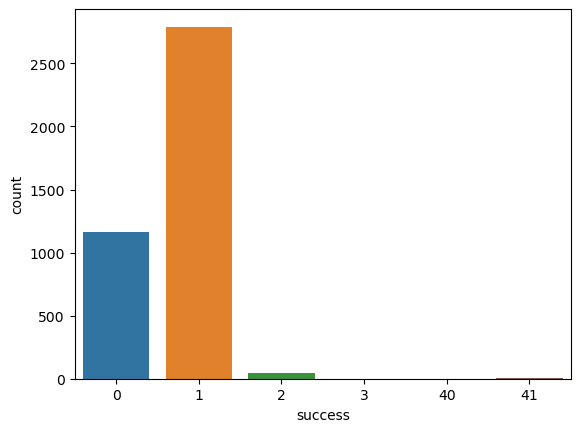

In [78]:
sns.countplot(x = 'success', data=success_operations)

In [94]:
age_platform = logs.merge(user_data, on='client')\
                    .query("platform == 'computer' & success == True")\
                    .loc[:, ['age']]
age_platform

,age
1,25
2,25
3,25
7,25
11,25
...,...
3409,29
3425,49
3432,46
3433,45


<Axes: xlabel='age', ylabel='count'>

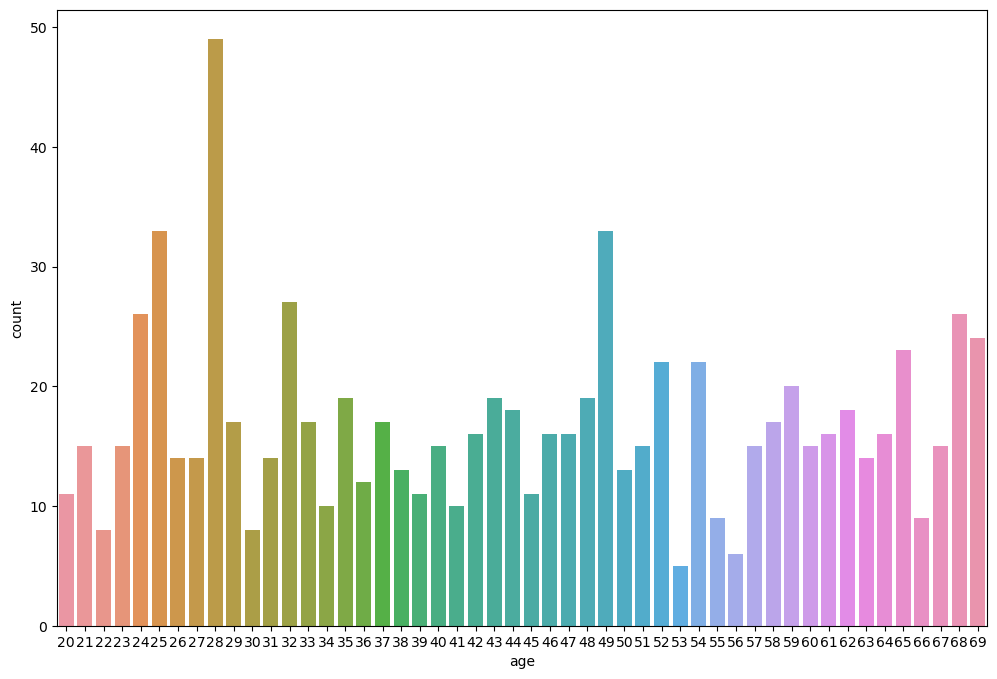

In [99]:
plt.figure(figsize=(12, 8))
sns.countplot(x = 'age', data=age_platform)